In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [92]:
calories  = pd.read_csv('calories.csv')

In [93]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [94]:
exercise_data = pd.read_csv('exercise.csv')

In [95]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [96]:
calories_data = pd.concat([exercise_data,calories['Calories']], axis = 1)

In [97]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [98]:
calories_data.shape

(15000, 9)

In [99]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data PreProcessing


Missing  Values

In [100]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


duplicated rows

In [101]:
calories_data.duplicated().sum()

0

In [102]:
calories_data.drop(columns=['User_ID'], axis=1, inplace=True)

In [103]:
#calories_data['Gender'].replace({'female':1, 'male':0}, inplace=True)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
calories_data['Gender'] = le.fit_transform(calories_data['Gender'])


In [104]:
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Data Analysis

In [105]:
calories_data.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [106]:
calories_data['Gender'].value_counts()

,count
Gender,
0,7553
1,7447


In [107]:
#sns.countplot(calories_data['Gender'])

<Axes: xlabel='Age', ylabel='Count'>

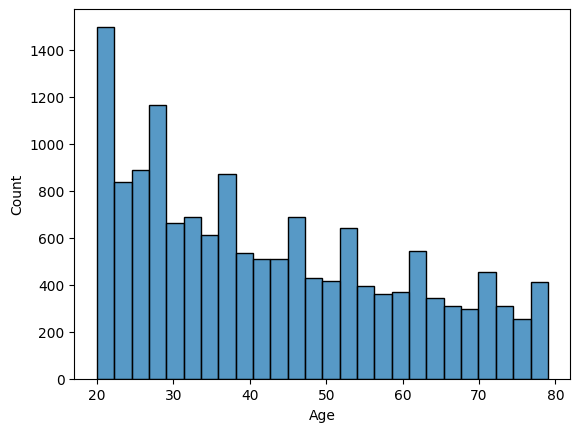

In [108]:
sns.histplot(calories_data['Age'])

<Axes: xlabel='Height', ylabel='Count'>

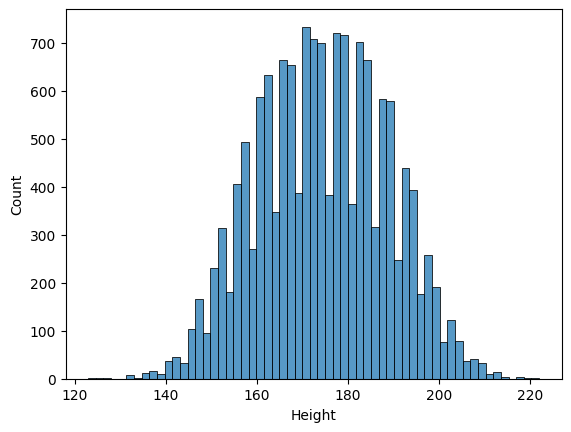

In [109]:
sns.histplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

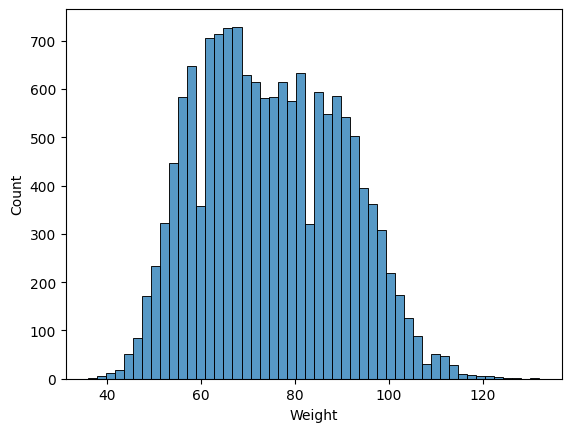

In [110]:
sns.histplot(calories_data['Weight'])

<Axes: xlabel='Duration', ylabel='Count'>

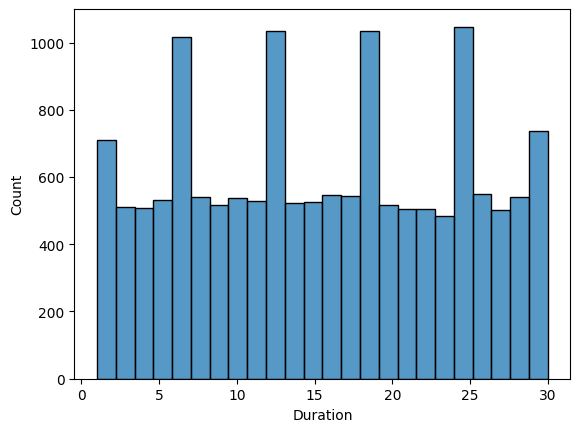

In [111]:
sns.histplot(calories_data['Duration'])

<Axes: xlabel='Heart_Rate', ylabel='Count'>

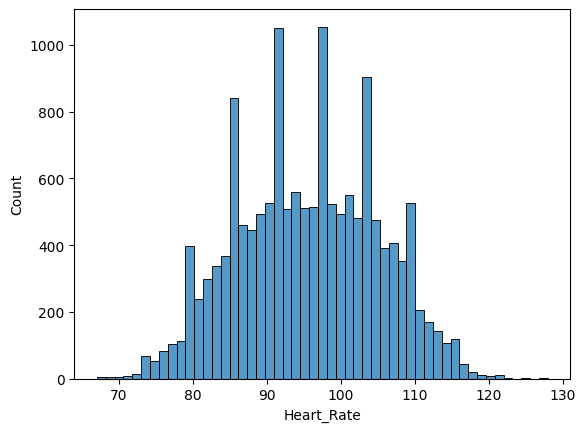

In [112]:
sns.histplot(calories_data['Heart_Rate'])

Finding the correlation in the dataset

In [113]:
corr = calories_data.corr(numeric_only=True)

In [114]:
corr

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


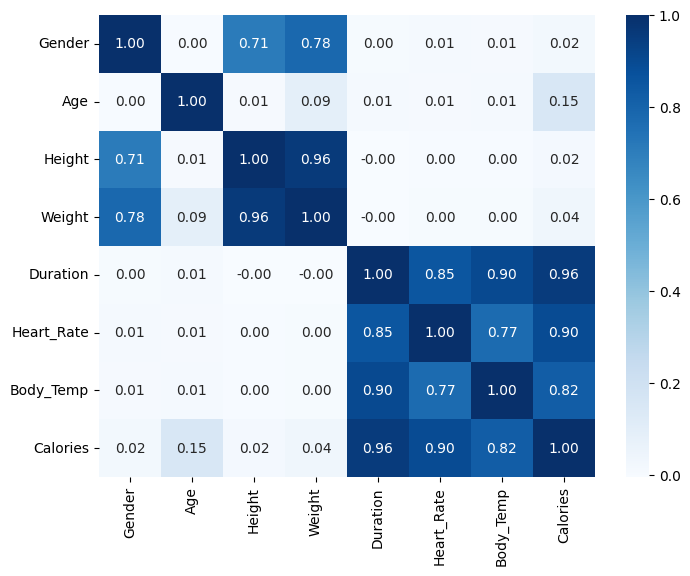

In [115]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, fmt='.2f',annot=True, cmap="Blues")
plt.show()

In [116]:
X = calories_data.drop(columns=['Calories'], axis=1)
Y = calories_data['Calories']

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [118]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [119]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Model Training



In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
regressor=LinearRegression()

In [122]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [123]:
regressor.coef_

array([ -0.70991161,   8.42645562,  -2.76912799,   4.71347188,
        55.29224648,  19.11241503, -13.32846891])

Prediction on Train data

In [124]:
y_pred = regressor.predict(X_train)

In [125]:
from sklearn.metrics import  mean_absolute_error, r2_score

mae = mean_absolute_error(Y_train, y_pred)
r2 = r2_score(Y_train, y_pred)

print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MAE: 8.332985229896742
R2 Score: 0.9672762198112508


Prediction on Test data

In [126]:
y_pred = regressor.predict(X_test)

In [127]:
from sklearn.metrics import  mean_absolute_error, r2_score

mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MAE: 8.385188053147179
R2 Score: 0.9668790377181355


In [128]:
input_data = (0,	20,	166.0,	60.0,	14.0,	94.0,	40.3)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data).reshape(1,-1)


scaled_data = scaler.transform(input_data_as_np_array)



predition = regressor.predict(scaled_data)



print(predition)


[58.02270423]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [129]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR

from sklearn.metrics import r2_score as r2


## Beginning Model Training
models = [LR(), KNR() , DTR(),RFR() ,SVR()]


for model in models:
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    r2_train = r2(Y_train, y_train_pred)
    r2_test = r2(Y_test, y_test_pred)


    print(type(model).__name__)

    print('Model performance for Training set')
    print("- Accuracy Score:", r2_train)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy Score:", r2_test)

    print('='*35)
    print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Model performance for Training set
- Accuracy Score: 0.9619281226841715
----------------------------------
Model performance for Test set
- Accuracy Score: 0.960377180598086


KNeighborsRegressor
Model performance for Training set
- Accuracy Score: 0.9952191373385294
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9936239571974134


DecisionTreeRegressor
Model performance for Training set
- Accuracy Score: 1.0
----------------------------------
Model performance for Test set
- Accuracy Score: 0.992694756966238


RandomForestRegressor
Model performance for Training set
- Accuracy Score: 0.9996922501032205
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9982106382216672


SVR
Model performance for Training set
- Accuracy Score: 0.9922087796518214
----------------------------------
Model performance for Test set
- Accuracy Score: 0.9912778731473455




In [130]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = SVR()
rfr.fit(X_train, Y_train)
r2_score(Y_test, rfr.predict(X_test))

0.9912778731473455

In [131]:
import pickle
filename = 'trained_model_calories.sav'
pickle.dump(rfr, open(filename, 'wb'))